In [20]:
import numpy as np
import pandas as pd
train_data = pd.read_excel('Data_Train.xlsx')
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [21]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [23]:
train_data['Price'].mean()

9087.064120565385

In [24]:
#How many unique airlines are there in the dataset
len(train_data['Airline'].unique())

12

In [25]:
#Which airline has the highest number of stops
train_stops = train_data[['Total_Stops', 'Airline']].groupby('Airline').count()
train_stops.head(10)

,Total_Stops
Airline,
Air Asia,319
Air India,1751
GoAir,194
IndiGo,2053
Jet Airways,3849
Jet Airways Business,6
Multiple carriers,1196
Multiple carriers Premium economy,13
SpiceJet,818


In [26]:
train_stops.sort_values('Total_Stops', ascending = False)

,Total_Stops
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [28]:
#How many train data from the sources (Banglore) had price more than 4600
train_data[(train_data['Source']=='Banglore') & (train_data['Price']>4600)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
21,Air India,21/03/2019,Banglore,New Delhi,BLR → COK → DEL,22:00,13:20 19 Mar,15h 20m,1 stop,No info,6955
...,...,...,...,...,...,...,...,...,...,...,...
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823
10667,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229


In [29]:
train_data[(train_data['Source']=='Banglore') & (train_data['Price']>4600)]['Airline']

4             IndiGo
6        Jet Airways
7        Jet Airways
8        Jet Airways
21         Air India
            ...     
10664         IndiGo
10667    Jet Airways
10674    Jet Airways
10680    Jet Airways
10681        Vistara
Name: Airline, Length: 1596, dtype: object

In [33]:
# Calculate the average price
average_price = train_data['Price'].mean()
# Apply conditions and create the 'price_range' column
train_data['price_range'] = df['Price'].apply(lambda x: 'Price far above average' if x - average_price > 500 else ('Price in the average range' if 0 <= x - average_price <= 500 else 'Price far below average'))

#how many airlines falls into each categories

train_data.groupby('price_range')['Airline'].count()

price_range
Price far above average       4623
Price far below average       5797
Price in the average range     263
Name: Airline, dtype: int64

In [37]:
#Which airline charge the most?
train_data[train_data['Price'] == train_data['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,price_range
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,Price far above average


In [40]:
#Which airline charge the least?
train_data[train_data['Price'] == train_data['Price'].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,price_range
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759,Price far below average
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759,Price far below average
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759,Price far below average
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759,Price far below average


In [39]:
#What was the average (mean) of all airlines per duration?
train_data.groupby('Duration')['Price'].mean()

Duration
10h        11915.571429
10h 10m    11727.304348
10h 15m    10666.340000
10h 20m    12666.310345
10h 25m    11450.224490
               ...     
9h 40m     10806.800000
9h 45m     11233.857143
9h 50m     11960.500000
9h 55m     15411.000000
9h 5m       8910.448276
Name: Price, Length: 368, dtype: float64

### Distribution plots

In [58]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Balogun\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

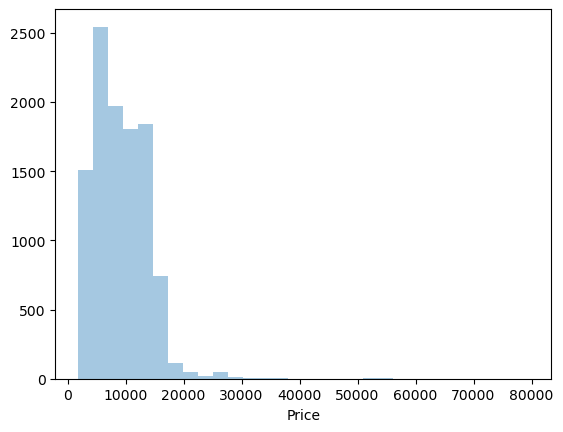

In [46]:
sns.distplot(train_data['Price'], kde=False,bins=30)

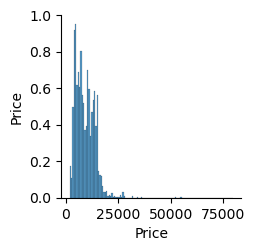

In [48]:
sns.pairplot(train_data)

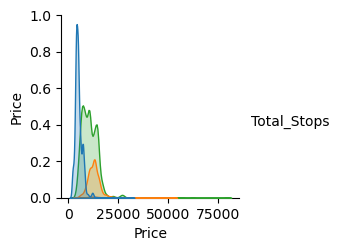

In [49]:
sns.pairplot(train_data, hue='Total_Stops')

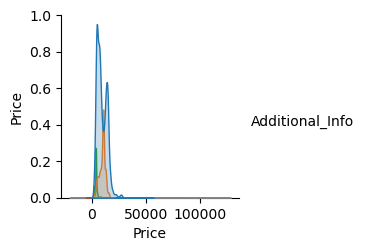

In [51]:
sns.pairplot(train_data, hue='Additional_Info')

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

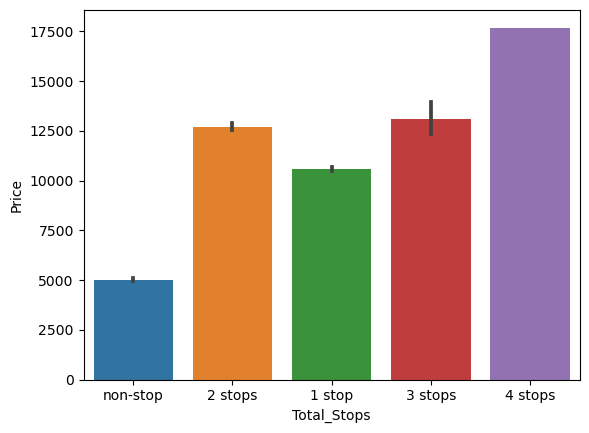

In [53]:
sns.barplot(x='Total_Stops', y='Price', data=train_data)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

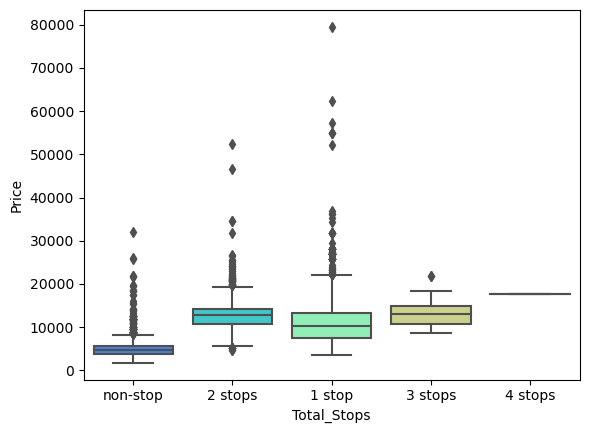

In [55]:
sns.boxplot(x='Total_Stops', y='Price', data= train_data, palette='rainbow')

C:\Users\Balogun\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


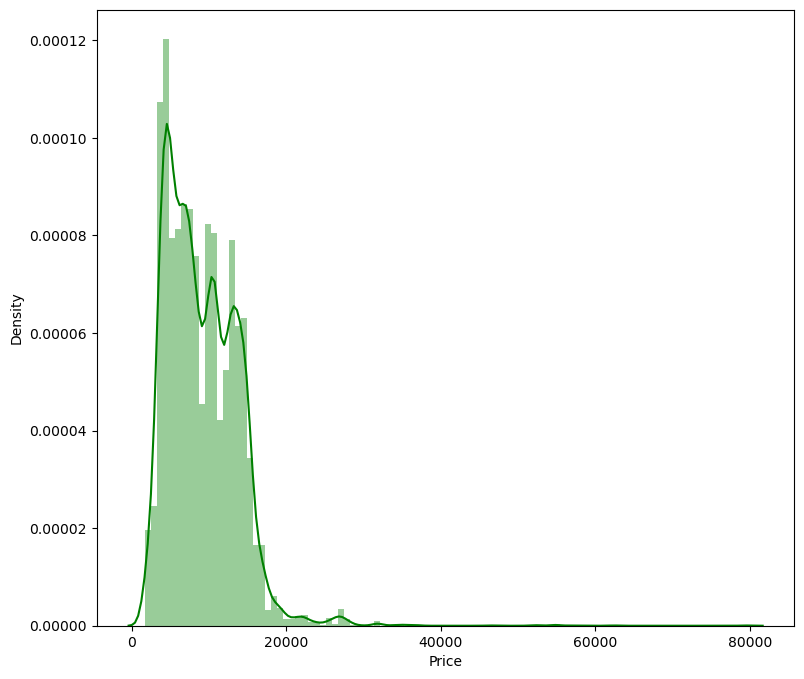

In [59]:
plt.figure(figsize=(9, 8))
sns.distplot(train_data['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [61]:
train_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [62]:
sample_data = train_data.sample(n=100, random_state=42)

In [63]:
sample_data.describe()

,Price
count,100.000000
mean,9047.810000
std,4323.926839
min,2175.000000
25%,5175.500000
50%,8363.500000
75%,13021.500000
max,22153.000000


In [64]:
#How can we use a sample to make inferences about the entire taxi dataset

# calculate the mean fare amount for the sample dataset
mean_sample_price = sample_data['Price'].mean()
print(f"Mean price Amount from the sample dataset is: {mean_sample_price:.2f}")

Mean price Amount from the sample dataset is: 9047.81


In [65]:
mean_popu_price = train_data['Price'].mean()
print(f"Mean price Amount from the population dataset is: {mean_popu_price:.2f}")

Mean price Amount from the population dataset is: 9087.06


In [66]:
print(len(train_data), len(sample_data))

10683 100


#### Central Limit theorem

<function matplotlib.pyplot.show(close=None, block=None)>

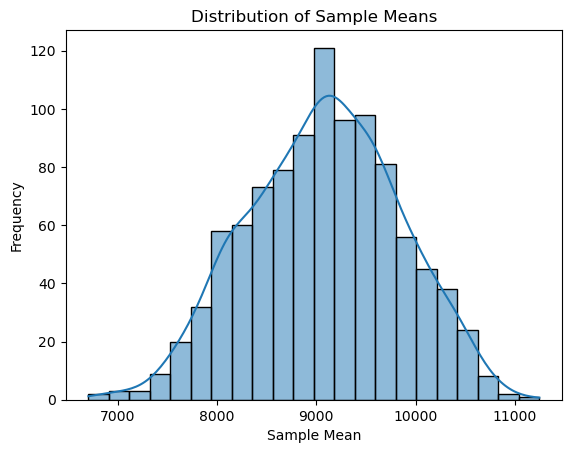

In [67]:
import numpy as np

sample_means = []
#repeat the process of taking samples and calculating means

for _ in range(1000):
   sample = np.random.choice(sample_data['Price'], size=30)
   sample_mean = np.mean(sample)
   sample_means.append(sample_mean)
    
#Plot a histogram of the sample means
sns.histplot(sample_means,kde=True)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show

#### Confidence Interval

In [68]:
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [69]:
sample = train_data['Price'].dropna()
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

population_std = 14.6  # Known population standard deviation
n = len(sample)
margin_of_error = z_score * (population_std / np.sqrt(n))
confidence_interval = (sample.mean() - margin_of_error, sample.mean() + margin_of_error)
print("Confidence Interval for Price (known variance):", confidence_interval)

Confidence Interval for Price (known variance): (9086.787264315068, 9087.340976815702)


In [74]:
sample.mean() 

9087.064120565385

#### Conclusion
The 95% confidence interval on the Train_data indicates that approximately 9087 of price is within the range of 9086.7 to 9087.3.

In [73]:
population_variance = train_data["Price"].var()
confidence_level = 0.90

sample_mean = train_data["Price"].mean()  # point estimate
sample_size = len(train_data)

z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (np.sqrt(population_variance) / np.sqrt(sample_size)) # k

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval for Price (unknown variance):", confidence_interval)

Confidence Interval for Price (unknown variance): (9013.678732996555, 9160.449508134214)


In [75]:
sample_mean = train_data["Price"].mean()

In [76]:
sample_mean

9087.064120565385

#### Conclusion
The 90% confidence interval on the Train_data indicates that approximately 9087 of price is within the range from 9013.7 to 9160.4.

#### Test for variability

In [78]:
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Load Train dataset
#titanic = sns.load_dataset("train_data")

# Calculate the standard deviation of ages
std_dev_ages = np.std(train_data['Price'], ddof=1)  # ddof=1 for sample standard deviation

# Calculate the confidence interval for the standard deviation
alpha = 0.05  # Significance level
n = len(train_data['Price'])
ci = stats.chi2.interval(1 - alpha, df=n - 1)
ci = (np.sqrt((n - 1) * std_dev_ages**2 / ci[1]), np.sqrt((n - 1) * std_dev_ages**2 / ci[0]))

print("Confidence Interval for Standard Deviation of Price:", ci)


Confidence Interval for Standard Deviation of Price: (4550.348626655547, 4674.03968980173)


#### Conclusion:
The confidence interval for the standard deviation of prices among Train passengers falls within the range of approximately 4550.35 to 4674.04.
This means that, with a confidence level of 95%, we estimate that the true standard deviation of prices for all Train passengers is likely to be within this interval.
The variability in ages among passengers is captured within this range, indicating that most passengers' prices are likely to be within 4550.35 to 4674.04 from the mean price.